# Úkol 1

## Autoři: Jan Kubát, Jan Matějka

### Importy knihoven

In [1]:
import pandas
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from operator import itemgetter
from collections import Counter
import copy

### Výpočet hodnot pro vstupní data

In [2]:
K = 8
L = len("Kubát")
X = ((K*L*23) % 20) + 1
Y = ((X + ((K*5 + L*7) % 19)) % 20) + 1
print("X = ",X)
print("Y = ",Y)

X =  1
Y =  20


### 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

In [3]:
# parsování vstupních souborů
d_X = list()
d_Y = list()

with open("hw1-source/" + '{0:03d}'.format(X) + ".txt") as f_X:
    for line_X in f_X:
        d_X.append(line_X)

with open("hw1-source/" + '{0:03d}'.format(Y) + ".txt") as f_Y:
    for line_Y in f_Y:
        d_Y.append(line_Y)
        
# vytvoření kolekce slov s jejich délkou
words_X = d_X[1].split(" ")
words_X_with_len = list()
for word_X in words_X:
    words_X_with_len.append((len(word_X), word_X))

words_Y = d_Y[1].split(" ")
words_Y_with_len = list()
for word_Y in words_Y:
    words_Y_with_len.append((len(word_Y), word_Y))

# vytvoření datové struktury k pohodlné práci s daty
data_X = pandas.DataFrame([{'word_length': a_X, 'word': b_X}
                  for a_X, b_X in words_X_with_len
                  if True])

data_Y = pandas.DataFrame([{'word_length': a_Y, 'word': b_Y}
                  for a_Y, b_Y in words_Y_with_len
                  if True])

print("Prvních 20 slov v odstavci (X):")
print(data_X[:20],"\n\n")

print("Prvních 20 slov v odstavci (Y):")
print(data_Y[:20])

# příprava dat pro histogram
data_X_grouped = data_X.groupby('word_length').count()
data_Y_grouped = data_Y.groupby('word_length').count()

Prvních 20 slov v odstavci (X):
        word  word_length
0        the            3
1   children            8
2     called            6
3        him            3
4    pierrot            7
5       from            4
6        the            3
7      first            5
8       that            4
9         is            2
10        of            2
11    course            6
12        no            2
13    proper            6
14      name            4
15       for            3
16         a            1
17   flemish            7
18       dog            3
19       but            3 


Prvních 20 slov v odstavci (Y):
           word  word_length
0           one            3
1       morning            7
2          when            4
3        gregor            6
4         samsa            5
5          woke            4
6          from            4
7      troubled            8
8        dreams            6
9            he            2
10        found            5
11      himself            7
12  transf

In [4]:
print('Střední hodnota X: ' + str(np.mean(data_X['word_length'])))
print('Rozptyl X: ' + str(np.var(data_X['word_length'])))
print()
print('Střední hodnota Y: ' + str(np.mean(data_Y['word_length'])))
print('Rozptyl Y: ' + str(np.var(data_Y['word_length'])))

Střední hodnota X: 4.3825
Rozptyl X: 4.13619375

Střední hodnota Y: 4.043636363636364
Rozptyl Y: 4.329004958677686


#### Zobrazeni histogramu pro X

Text(0,0.5,'Counts of the words')

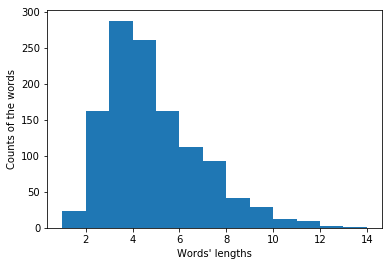

In [5]:
N_X, bins, patches = plt.hist(data_X['word_length'], bins=len(data_X_grouped), density = False)
plt.xlabel('Words\' lengths')
plt.ylabel('Counts of the words')

#### Zobrazeni histogramu pro Y

Text(0,0.5,'Counts of the words')

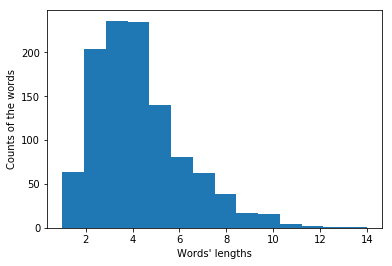

In [6]:
N_Y, bins, patches = plt.hist(data_Y['word_length'], bins=len(data_Y_grouped), density = False)
plt.xlabel('Words\' lengths')
plt.ylabel('Counts of the words')

### 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

In [7]:
# vytvoření kolekce slov s jejich délkou
string_X = d_X[1].replace(" ", "")
string_Y = d_Y[1].replace(" ", "")

# třída Counter ze vstupního řetězce spočítá četnost jednotlivých znaků
c_X = Counter(string_X)
c_Y = Counter(string_Y)

# vytvoření datové struktury k pohodlné práci s daty
data_X_letters = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c_X.most_common(), key = lambda val : val[0])
                  if True])
data_Y_letters = pandas.DataFrame([{'count': a, 'letter': b}
                  for b, a in sorted(c_Y.most_common(), key = lambda val : val[0])
                  if True])

suma_X = sum(data_X_letters['count'])
suma_Y = sum(data_Y_letters['count'])

rel_data_X = copy.deepcopy(data_X_letters)
rel_data_X.rename(columns={'count':'percentage'}, inplace=True)
rel_data_X['percentage'] = (data_X_letters['count'] / suma_X) * 100

rel_data_Y = copy.deepcopy(data_Y_letters)
rel_data_Y.rename(columns={'count':'percentage'}, inplace=True)
rel_data_Y['percentage'] = (data_Y_letters['count'] / suma_Y) * 100

print("Výčet znaků (bez mezery) (X) a jejich četnost:")
print(data_X_letters)

print('\nSoučet počtu písmen řetězce X: ', suma_X )

Výčet znaků (bez mezery) (X) a jejich četnost:
    count letter
0     438      a
1      96      b
2     102      c
3     303      d
4     659      e
5     137      f
6     141      g
7     337      h
8     297      i
9      15      j
10     52      k
11    249      l
12    109      m
13    355      n
14    399      o
15     91      p
16      6      q
17    350      r
18    291      s
19    436      t
20    159      u
21     30      v
22    117      w
23      1      x
24     83      y
25      6      z

Součet počtu písmen řetězce X:  5259


In [8]:
print('\nVýčet znaků (bez mezery) (X) a jejich relativní četnost v (%):')
print(rel_data_X)


Výčet znaků (bez mezery) (X) a jejich relativní četnost v (%):
    percentage letter
0     8.328580      a
1     1.825442      b
2     1.939532      c
3     5.761552      d
4    12.530899      e
5     2.605058      f
6     2.681118      g
7     6.408062      h
8     5.647461      i
9     0.285225      j
10    0.988781      k
11    4.734740      l
12    2.072637      m
13    6.750333      n
14    7.586994      o
15    1.730367      p
16    0.114090      q
17    6.655258      r
18    5.533371      s
19    8.290550      t
20    3.023388      u
21    0.570451      v
22    2.224758      w
23    0.019015      x
24    1.578247      y
25    0.114090      z


In [9]:
print("Výčet znaků (bez mezery) (Y) a jejich četnost:")
print(data_Y_letters)

print('\nSoučet počtu písmen řetězce Y: ', suma_Y )

print('\nVýčet znaků (bez mezery) (Y) a jejich relativní četnost v (%):')
print(rel_data_Y)

Výčet znaků (bez mezery) (Y) a jejich četnost:
    count letter
0     341      a
1      77      b
2     110      c
3     182      d
4     550      e
5     106      f
6     105      g
7     308      h
8     284      i
9       3      j
10     47      k
11    229      l
12     95      m
13    258      n
14    342      o
15     70      p
16      7      q
17    222      r
18    269      s
19    446      t
20    151      u
21     59      v
22    102      w
23      7      x
24     75      y
25      3      z

Součet počtu písmen řetězce Y:  4448

Výčet znaků (bez mezery) (Y) a jejich relativní četnost v (%):
    percentage letter
0     7.666367      a
1     1.731115      b
2     2.473022      c
3     4.091727      d
4    12.365108      e
5     2.383094      f
6     2.360612      g
7     6.924460      h
8     6.384892      i
9     0.067446      j
10    1.056655      k
11    5.148381      l
12    2.135791      m
13    5.800360      n
14    7.688849      o
15    1.573741      p
16    0.157374    

#### Zobrazeni grafu pro hodnotu X

Text(0.5,0,'Letters')

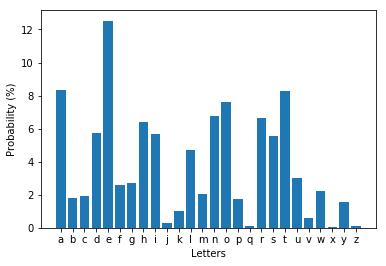

In [10]:
plt.bar(rel_data_X['letter'], rel_data_X['percentage'])
plt.ylabel('Probability (%)')
plt.xlabel('Letters')

#### Zobrazeni grafu pro hodnotu Y

Text(0.5,0,'Letters')

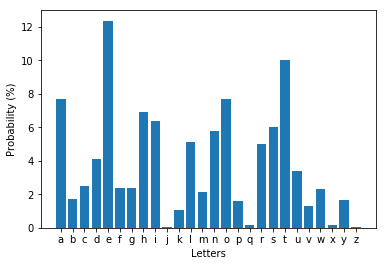

In [11]:
plt.bar(rel_data_Y['letter'], rel_data_Y['percentage'])
plt.ylabel('Probability (%)')
plt.xlabel('Letters')

### 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

##### Postup: Provedeme test nezávislosti v kontingenční tabulce. Nejprve vytvoříme tabulku s počtem slov konkrétní délky - jeden soubor v jednom řádku. Potom sloučíme slupce s nejmenším počtem pozorování, tak abychom měli v každém políčku alespoň 5.

In [12]:
# Vytvoreni datovych struktur pro jednotlive soubory
X_word_lengths = list()
for x in range(1,15):
    try:
        X_word_lengths.append(data_X_grouped['word'][x])
    except KeyError:
        X_word_lengths.append(0)

Y_word_lengths = list()
for y in range(1,15):
    try:
        Y_word_lengths.append(data_Y_grouped['word'][y])
    except KeyError:
        Y_word_lengths.append(0)

# Vytvoreni matice dat
Word_lengths_matrix = np.matrix([X_word_lengths,Y_word_lengths])
print("Matice s délkami slov")
print(Word_lengths_matrix)

# Chceme alespon 5 pozorovani v kazdem chlivecku - sloucime nejmensi
temp_X_list = list()
temp_Y_list = list()

for i in range (10):
    temp_X_list.append(Word_lengths_matrix[0,i])
    temp_Y_list.append(Word_lengths_matrix[1,i])

new_X = 0
new_Y = 0

for i in range (10,14):
    new_X += Word_lengths_matrix[0,i]
    new_Y += Word_lengths_matrix[1,i]

temp_X_list.append(new_X)
temp_Y_list.append(new_Y)


Word_lengths_matrix_shortend = np.matrix([temp_X_list,temp_Y_list])

print("\n\nMatice s délkami slov s alespoň 5 pozorováními v každém políčku")
print(Word_lengths_matrix_shortend)

Matice s délkami slov
[[ 24 163 288 261 163 113  93  41  29  12  10   2   0   1]
 [ 64 204 236 234 140  81  62  38  17  16   4   2   1   1]]


Matice s délkami slov s alespoň 5 pozorováními v každém políčku
[[ 24 163 288 261 163 113  93  41  29  12  13]
 [ 64 204 236 234 140  81  62  38  17  16   8]]


##### Pomocí funkce 'stats.chi2_contingency' provedeme test nezávislosti v kontingenční tabulce. Podle nalezené p-hodnoty rozhodneme o zamítnutí H0.

In [13]:
s, p, d, e = stats.chi2_contingency(Word_lengths_matrix_shortend, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)
print("\n\nP-hodnota je nejnižší hodnota, kdy zamítáme H0.")
print("Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy " + ("" if 0.05 > p else "NE") + "zamítáme H0.")
print(("Z" if 0.05 > p else "NEz") + "amítáme tedy, že rozdělení délek slov nezávisí na tom, o který text jde.")


Hodnota testové statistiky:  43.35986059056012
p-hodnota: 4.287725068452928e-06


P-hodnota je nejnižší hodnota, kdy zamítáme H0.
Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy zamítáme H0.
Zamítáme tedy, že rozdělení délek slov nezávisí na tom, o který text jde.


### 4. Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.

##### Postup: Rovnost středních délek slov v obou textech otestujeme dvouvýběrovým testem. Jako odhad střední hodnoty použijeme výberový rozptyl.

In [14]:
# Příprava dat
n = len(data_X['word_length'])
m = len(data_Y['word_length'])
sX2 = np.var(data_X['word_length'])
sY2 = np.var(data_Y['word_length'])
print("Výběrový rozptyl X:", sX2)
print("Výběrový rozptyl Y:", sY2)

Výběrový rozptyl X: 4.13619375
Výběrový rozptyl Y: 4.329004958677686


##### Nejprve provedeme test shodnosti rozptylů, abychom mohli použít správný dvouvýběrový test.

In [15]:
F = sX2 / sY2
print("Testová statistika:", F)
p_value = 2*stats.f.sf(F, n-1, m-1)
print("p-hodnota:", p_value)
print("\n\nP-hodnota je nejnižší hodnota kdy zamítáme H0.")
print("Testujeme na hladině významnosti 5%: 0.05 < p-hodnota, tedy " + ("" if 0.05 > p_value else "NE") + "zamítáme H0.")
print(("Z" if 0.05 > p_value else "NEz") + "amítáme, že se rozptyly délky slov v obou textech rovnají.")
print("\nBudeme tedy uvažovat stejné rozptyly.")

Testová statistika: 0.9554606172739103
p-hodnota: 1.5601104451429566


P-hodnota je nejnižší hodnota kdy zamítáme H0.
Testujeme na hladině významnosti 5%: 0.05 < p-hodnota, tedy NEzamítáme H0.
NEzamítáme, že se rozptyly délky slov v obou textech rovnají.

Budeme tedy uvažovat stejné rozptyly.


##### Použijeme tedy k testování dvouvýběrový t-test se shodnými rozptyly: 'stats.ttest_ind( .. , .. , equal_var = True)'

In [16]:
T_, p_ = stats.ttest_ind(data_X['word_length'], data_Y['word_length'], equal_var = True)
print("Hodnota testové statistiky T = ", T_)
print("p_hodnota: ", p_)
print("\nTestujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy " + ("" if 0.05 > p_ else "NE") + "zamítáme H0.")
print(("Z" if 0.05 > p_ else "NEz") + "amítáme, že se střední délky slov v obou textech rovnají.")

Hodnota testové statistiky T =  3.9461235247098236
p_hodnota:  8.181012225938807e-05

Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy zamítáme H0.
Zamítáme, že se střední délky slov v obou textech rovnají.


### 5. Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

##### Postup: Totožný s příkladem č. 3.

In [17]:
# Vytvoreni datovych struktur pro oba soubory
X_letters = list()
for x in range(26):
    try:
        X_letters.append(data_X_letters['count'][x])
    except KeyError:
        X_letters.append(0)

Y_letters = list()
for y in range(26):
    try:
        Y_letters.append(data_Y_letters['count'][y])
    except KeyError:
        Y_letters.append(0)

# Vytvoreni matice
Letters_matrix = np.matrix([X_letters,Y_letters])
print("Matice s četností písmen")
print(Letters_matrix)

# Chceme alespon 5 pozorovani v kazdem chlivecku - sloucime nejmensi
temp_X_list = list()
temp_Y_list = list()

for i in range (9):
    temp_X_list.append(Letters_matrix[0,i])
    temp_Y_list.append(Letters_matrix[1,i])

new_X = Letters_matrix[0,9] + Letters_matrix[0,23] + Letters_matrix[0,25]
new_Y = Letters_matrix[1,9] + Letters_matrix[1,23] + Letters_matrix[1,25]

for i in range (10,23):
    temp_X_list.append(Letters_matrix[0,i])
    temp_Y_list.append(Letters_matrix[1,i])

temp_X_list.append(Letters_matrix[0,24])
temp_Y_list.append(Letters_matrix[1,24])

temp_X_list.append(new_X)
temp_Y_list.append(new_Y)


Letters_shortend = np.matrix([temp_X_list,temp_Y_list])

print("\n\nMatice četností s alespoň 5 pozorováními v každém políčku")
print(Letters_shortend)

Matice s četností písmen
[[438  96 102 303 659 137 141 337 297  15  52 249 109 355 399  91   6 350
  291 436 159  30 117   1  83   6]
 [341  77 110 182 550 106 105 308 284   3  47 229  95 258 342  70   7 222
  269 446 151  59 102   7  75   3]]


Matice četností s alespoň 5 pozorováními v každém políčku
[[438  96 102 303 659 137 141 337 297  52 249 109 355 399  91   6 350 291
  436 159  30 117  83  22]
 [341  77 110 182 550 106 105 308 284  47 229  95 258 342  70   7 222 269
  446 151  59 102  75  13]]


##### Test nezávislosti v kontingenční tabulce

In [18]:
s, p, d, e = stats.chi2_contingency(Letters_shortend, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)
print("\n\nP-hodnota je nejnižší hodnota kdy zamítáme H0.")
print("Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy " + ("" if 0.05 > p else "NE") + "zamítáme H0.")
print(("Z" if 0.05 > p else "NEz") + "amítáme tedy, že rozdělení písmen nezávisí na tom, o který text jde.")


Hodnota testové statistiky:  65.6236724168852
p-hodnota: 5.651904134211853e-06


P-hodnota je nejnižší hodnota kdy zamítáme H0.
Testujeme na hladině významnosti 5%: 0.05 > p-hodnota, tedy zamítáme H0.
Zamítáme tedy, že rozdělení písmen nezávisí na tom, o který text jde.
